# Epidemiologi
## 1. Oppgave 8.21 i boka
### a)
En syk person vil smitte b * S(t) personer, det fører til at I(t) syke personer vil smitte b * S(t)I(t) personer. Det er minus forran uttrykket fordi S'(t) forteller oss hvordan antallet utsatte forandre seg, og S'(t) reduseres.

Siden det er f prosent av de syke som blir friske, vil f * I(t) fortelle oss hvor mange syke som blir friske. R'(t) forteller oss hvor mange personer som har blitt friske.
### b)
Vi vet at S(t) + R(t) + I(t) = N fordi befolkningen N er delt i de tre gruppene S, R og I, og N er konstant. Hvis vi deriverer hver av sidene i likningen vil vi få S'(t) + R'(t) + I'(t) = 0.

Ved bruk av likningen over kan vi finne et utrykk for I'(t).

    S'(t) + R'(t) + I'(t) = 0 
    I'(t) = - S'(t) - R'(t)
    I'(t) = b * S(t)I(t) - f * I(t)
### c)


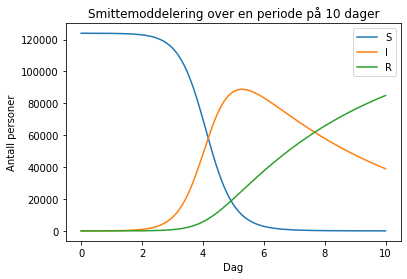

In [54]:
from pylab import*

N = 124000

n = 10000
t = linspace(0,10,n)
dt = t[1] - t[0]

S = zeros(n)
I = zeros(n)
R = zeros(n)

b = 2E-5
f = 0.2
S[0] = N - 10
I[0] = 10

for i in range(n - 1):
    S[i+1] = S[i] - dt*b*S[i]*I[i]
    I[i+1] = I[i] + dt*(b*S[i]*I[i] - f*I[i])
    R[i+1] = R[i] + dt*f*I[i]

plot(t,S,t,I,t,R)
title("Smittemoddelering over en periode på 10 dager")
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
show()

### d)

In [55]:
from pylab import*

def SIR(n,b,f,S0,I0,R0):
    t0 = 0
    t1 = 10
    t = linspace(t0,t1,n)
    dt = t[1] - t[0]
    
    S = zeros(n)
    I = zeros(n)
    R = zeros(n)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(n - 1):
        S[i+1] = S[i] - dt*b(t[i])*S[i]*I[i]
        I[i+1] = I[i] + dt*(b(t[i])*S[i]*I[i]-f(t[i])*I[i])
        R[i+1] = R[i] + dt*f(t[i])*I[i]
    return t,S,I,R

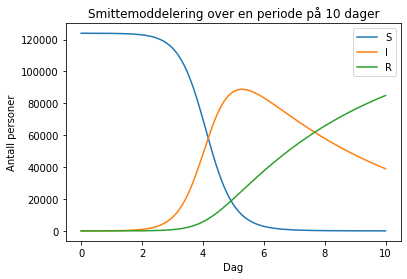

In [56]:

def f(t):
    return 0.2
def b(t):
    return 2E-5

n = 10000
N = 124000
S0 = N - 10
I0 = 10
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
title("Smittemoddelering over en periode på 10 dager")
show()

### e)

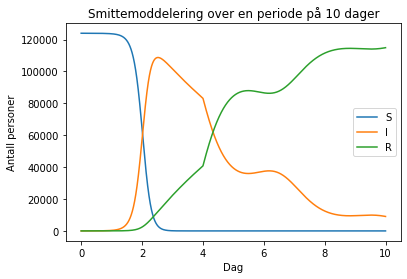

In [57]:

def f(t):
    if t < 4:
        return 0.2
    else:
        return 0.4 + 0.5*sin(0.6*pi*t)

def b(t):
    return 2E-5*(t + 1)*exp(-0.01*t**2)

n = 10000
N = 124000
S0 = N - 10
I0 = 10
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
title("Smittemoddelering over en periode på 10 dager")
legend(["S","I","R"])
xlabel("Dag")
ylabel("Antall personer")
show()

## 2./3. Smittede i Norge av Corona

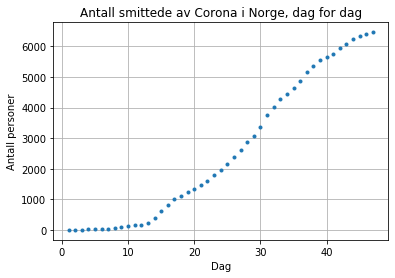

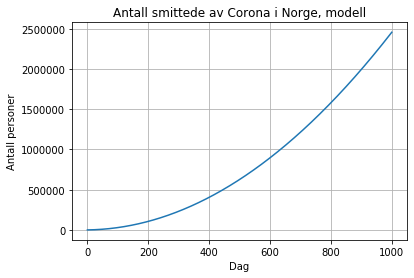

In [60]:
from pylab import*

data = loadtxt('coronatall.txt',delimiter=' ')

dag = data[:,0]
antall = data[:,1]
mdag = linspace(0,1000,1000)

p3 = polyfit(dag, antall, 2)

plot(dag,antall,'.')
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, dag for dag")
grid()
show()

plot(mdag,polyval(p3,mdag))
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, modell")
grid()
show()

## 4.

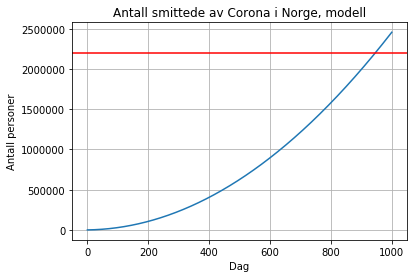

In [61]:
plot(mdag,polyval(p3,mdag))
xlabel("Dag")
ylabel("Antall personer")
title("Antall smittede av Corona i Norge, modell")
axhline(y=2200000, color="red")
grid()
show()

I følge modellen min vil det være 2,2 millioner mennesker smittet av corona ca 950 dager etter førse meldte smittede.

## 5./6.

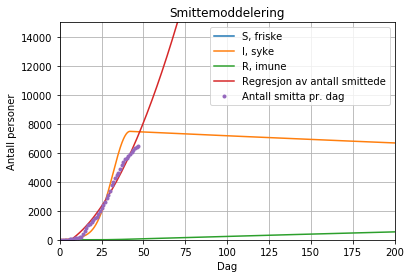

In [62]:
from pylab import*

def SIR(n,b,f,S0,I0,R0):
    t0 = 0
    t1 = 1500
    t = linspace(t0,t1,n)
    dt = t[1] - t[0]
    
    S = zeros(n)
    I = zeros(n)
    R = zeros(n)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(n-1):
        S[i+1] = S[i] - dt*b(t[i])*S[i]*I[i]
        I[i+1] = I[i] + dt*(b(t[i])*S[i]*I[i]-f(t[i])*I[i])
        R[i+1] = R[i] + dt*f(t[i])*I[i]
    return t,S,I,R

b1 = 3.775E-8
b2 = 1.8E-9

def f(t):
    return 0.00045

def b(t):
    if t < 21:
        return b1
    elif t >= 21 and t < 42:
        return b1 - (t-21)*b2
    else:
        return b1 - 21*b2


n = 10000
N = 5300000
S0 = N - 15
I0 = 15
R0 = 0

t,S,I,R = SIR(n,b,f,S0,I0,R0)

plot(t,S,t,I,t,R)
plot(mdag,polyval(p3,mdag))
plot(dag,antall,'.')
legend(["S, friske","I, syke","R, imune","Regresjon av antall smittede", "Antall smitta pr. dag"])
title("Smittemoddelering")
xlabel("Dag")
ylabel("Antall personer")
xlim(0,200)
ylim(0,15000)
grid()
show()


Hvis vi ser på tallene av antall smitta pr. dag og sammenlikner det med I, antall syke, i SIR-modellen kan vi se at begge grafene starter ganske likt. Forskjellen er at ved ca. 35 dager viser modellen at det plutselig ikke blir flere syke, det er ganske urealistisk. Om vi ser på antall smitta pr. dag, ser vi at endringen i antall smitta minker ved ca. 35 dager. Men ikke like mye som I, i og med at den grafen ikke bare minker, men synker. Det jeg mener er mest realistisk er at endringen i antall smitta minker mer og mer for hver dag, men ikke like fort som I.

Vi har satt inn forskjellige b verdier fordi det er endringer i smitten. B1 viser til situasjonene før det ble satt inn særlig restriksjoner. Så ble det satt inn restriksjoner av staten, men det tar tid før det funker. I perioden mellom 21 dager og 42 dager etter første smitte, har vi latt b verdien gå ned lineært. Det blir mindre smitte fordi folk er ikke så mye sammen lenger. Etter 42 dager så blir det ikke mindre smitte og b holder seg konstant igjen. 

Den lineære nedgangen får vi av startpunktet som er B1 som synker med B2 per dag. B1-21*B2 får vi av at vi har satt t lik 42 i den lineære nedgangen og vil derfor holde seg konstant

B1-, B2- og F-verdiene finner vi ved å teste oss frem. Vi får I-grafen til å være litt høyere enn  regresjonen, men ikke for mye. Dette er fordi vi valgte å modellere på den informasjonen vi vet og at det mer mange svarte tall om smittede som ikke er registrert. Derfor har vi bare sett på de første 200 dagene. Dette er fordi SIR modellen ikke passer til Koronasituasjonen i Norge. Vi har satt at 15 personer hadde smitten i starten fordi det mange som kom fra utlandet med smitten.